In [156]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import scipy

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=7,
                    suppress=True)

# First data analysis

In [157]:
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Analize missing values.

In [73]:
missed = dict()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    
    if pct_missing > 0:
        print('{} - {}%'.format(col, round(pct_missing*100)))
        missed[col] = pct_missing * 100

In [74]:
len(missed)

0

In [75]:
tgt = df.pop('medv')
y = tgt

# Dummy linear

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import make_scorer

scorer = make_scorer(mape)
model = LinearRegression()
score = cross_val_score(model, df, y=y,
                        scoring=scorer, cv=10)
score.mean()

0.21296141306336094

In [77]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge

def dummy_linear_score(df, y, cv=5):
    scorer = make_scorer(mape)
    model = LinearRegression()
    cv = KFold(cv, shuffle=True)
    return cross_val_score(model, df, y,
                          scoring=scorer, cv=cv)

def dummy_lasso_score(df, y, cv=5):
    scorer = make_scorer(mape)
    model = Lasso()
    cv = KFold(cv, shuffle=True)
    return cross_val_score(model, df, y,
                          scoring=scorer, cv=cv)

def dummy_ridge_score(df, y, cv=5):
    scorer = make_scorer(mape)
    model = Ridge()
    cv = KFold(cv, shuffle=True)
    return cross_val_score(model, df, y,
                          scoring=scorer, cv=cv)

# Polynomial features

In [78]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
df_poly = poly.fit_transform(df)
df = df_poly


In [79]:
df = pd.DataFrame(df)

# Target transforming

In [80]:
y_log = np.log(y.values)

def bias(model, df_train, y_train):
    y_pred = model(df_train)
    bias = sum((y_pred - y_train) ** 2) / (2 * len(y_train))
    return bias

y = y_log

# Feature selection

F-test for feature influences

In [81]:
from sklearn.feature_selection import f_regression

p_values = f_regression(df, y)[1]
threshold = 0.02
idx = np.arange(df.values.shape[1])
filt = p_values < threshold

f_cols = df.columns[idx[filt]]
df[f_cols]

,1,2,3,4,5,6,7,8,9,10,...,549,550,552,553,554,555,556,557,558,559
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,7340.9184,3581.577,1165.7682,2.410203e+06,30241.39860,379.44612,6.252350e+07,7.844975e+05,9843.278760,123.505992
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,20216.5832,5639.752,2895.9176,2.804027e+06,64572.45480,1487.00488,6.252350e+07,1.439821e+06,33156.867240,763.551944
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,3930.2978,5639.752,1276.8652,2.746814e+06,28179.26722,289.08802,6.061972e+07,6.218911e+05,6379.912747,65.450827
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,1918.8792,6539.203,1028.0886,2.912204e+06,21695.96814,161.63532,6.145685e+07,4.578545e+05,3411.023868,25.412184
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,6306.7758,6539.203,1863.8477,2.945804e+06,39559.41990,531.24643,6.252350e+07,8.396328e+05,11275.492410,151.419437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,25527.9297,9261.000,4264.4700,3.226779e+06,79601.40930,1963.68690,6.023168e+07,1.485855e+06,36654.553711,904.231063
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,22507.8672,9261.000,4004.2800,3.308122e+06,75680.89200,1731.37440,6.252350e+07,1.430369e+06,32722.976160,748.613312
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,8684.0208,9261.000,2487.2400,3.308122e+06,47008.83600,668.00160,6.252350e+07,8.884670e+05,12625.230240,179.406144
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,11463.3792,9261.000,2857.6800,3.250861e+06,53540.67600,881.79840,6.090720e+07,1.003123e+06,16521.122880,272.097792


Prune high-correlated features

In [82]:
corr_matrix = df[f_cols].corr().abs()

corr_pairs = []
for i in range(len(f_cols)):
    for j in range(i):
        if corr_matrix.values[i][j] > 0.995:
            corr_pairs.append([f_cols[i], f_cols[j]])
    
to_drop = set()
for pair in corr_pairs:
    to_drop.add(max(*pair))
    
df = df[f_cols].drop(columns=to_drop)

In [83]:
df

,1,2,3,4,5,6,7,8,9,10,...,548,549,552,553,554,555,556,557,558,559
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,5.850624e+05,7340.9184,1165.7682,2.410203e+06,30241.39860,379.44612,6.252350e+07,7.844975e+05,9843.278760,123.505992
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,8.778952e+05,20216.5832,2895.9176,2.804027e+06,64572.45480,1487.00488,6.252350e+07,1.439821e+06,33156.867240,763.551944
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,3.831114e+05,3930.2978,1276.8652,2.746814e+06,28179.26722,289.08802,6.061972e+07,6.218911e+05,6379.912747,65.450827
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,2.575671e+05,1918.8792,1028.0886,2.912204e+06,21695.96814,161.63532,6.145685e+07,4.578545e+05,3411.023868,25.412184
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,4.696359e+05,6306.7758,1863.8477,2.945804e+06,39559.41990,531.24643,6.252350e+07,8.396328e+05,11275.492410,151.419437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,1.034818e+06,25527.9297,4264.4700,3.226779e+06,79601.40930,1963.68690,6.023168e+07,1.485855e+06,36654.553711,904.231063
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,9.838516e+05,22507.8672,4004.2800,3.308122e+06,75680.89200,1731.37440,6.252350e+07,1.430369e+06,32722.976160,748.613312
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,6.111149e+05,8684.0208,2487.2400,3.308122e+06,47008.83600,668.00160,6.252350e+07,8.884670e+05,12625.230240,179.406144
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,6.960288e+05,11463.3792,2857.6800,3.250861e+06,53540.67600,881.79840,6.090720e+07,1.003123e+06,16521.122880,272.097792


# Stepwise selection

In [84]:
from mlxtend.feature_selection import SequentialFeatureSelector

model = LinearRegression()
cv = KFold(shuffle=True)

sfs = SequentialFeatureSelector(model, k_features=15, forward=True,
                                floating=True, 
                                scoring='neg_mean_absolute_percentage_error', cv=cv,
                                verbose=True, n_jobs=-1)
sfs.fit(df, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 377 out of 377 | elapsed:    0.6s finished
Features: 1/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 376 out of 376 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/15[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                          estimator=LinearRegression(), floating=True,
                          k_features=15, n_jobs=-1,
                          scoring='neg_mean_absolute_percentage_error',
                          verbose=True)

In [85]:
sfs_cols = list(sfs.k_feature_names_)

In [86]:
sfs.k_feature_idx_

(12, 16, 83, 110, 116, 170, 230, 247, 270, 271, 291, 292, 312, 343, 351)

In [87]:
scores = []
for i in range(60):
    scores.append(dummy_lasso_score(df[sfs_cols], y).mean())
    # scores.append(dummy_linear_score(df, y).mean())

sum(scores) / len(scores)

0.04302956987477198

In [88]:
# df = df_poly[:, sfs.k_feature_idx_]
df = df[sfs_cols]
# df = df

# Outliers

In [89]:
X = df.values

pseudo_inv = np.linalg.inv(X.T @ X)
leverage = (X @ pseudo_inv) @ X.T
leverage

array([[0.0097352, 0.0050539, 0.0045282, ..., 0.0018535, 0.0016624,
        0.0029379],
       [0.0050539, 0.0048643, 0.0034947, ..., 0.0046753, 0.004718 ,
        0.0050839],
       [0.0045282, 0.0034947, 0.0093249, ..., 0.0110787, 0.0096836,
        0.0052969],
       ...,
       [0.0018535, 0.0046753, 0.0110787, ..., 0.0213222, 0.0196033,
        0.0135698],
       [0.0016624, 0.004718 , 0.0096836, ..., 0.0196033, 0.0182166,
        0.013239 ],
       [0.0029379, 0.0050839, 0.0052969, ..., 0.0135698, 0.013239 ,
        0.0131798]])

In [90]:
p = df.shape[1]
outliers = []
n = df.shape[0]

for i in range(df.shape[0]):
    if leverage[i][i] > (2 * p) / n:
        outliers.append(i)
        
len(outliers)

48

In [91]:
# df_tmp = np.delete(df, outliers, axis=0)
df_tmp = df.drop(outliers)
y_tmp = np.delete(y, outliers, axis=0)

dummy_lasso_score(df_tmp, y_tmp).mean()

0.038907287039250095

# Distribution analysis (on sh. center linear model)

<AxesSubplot:ylabel='Density'>

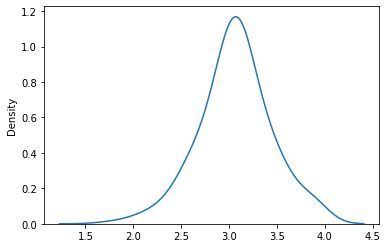

In [92]:
import seaborn as sns

sns.kdeplot(y_tmp, bw_adjust=1.5)

# Residual analysis (on sh. center linear model)

0.03212193318106182

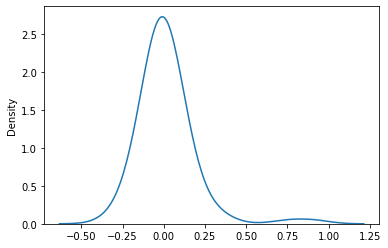

In [152]:
from sklearn.model_selection import train_test_split as split

df_train, df_val, y_train, y_val = split(df_tmp, y_tmp,
                                         shuffle=True,
                                         test_size=0.2)
model = LinearRegression()
model.fit(df_train, y_train)

y_pred = model.predict(df_val)

res = (y_val - y_pred)

sns.kdeplot(res,
           bw_adjust=1.5)
mape(y_val, y_pred)

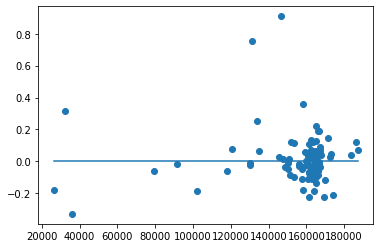

In [153]:
# norms = (df_val.values ** 2).sum(axis=-1) ** (1 / 2)
norms = (df_val ** 2).values.sum(axis=-1) ** (1 / 2)
plt.scatter(norms, res)
plt.plot([norms.min(), norms.max()], [0, 0])

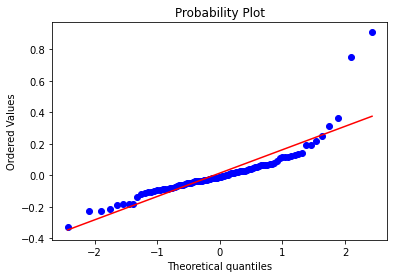

In [154]:
import numpy as np 
import scipy.stats as stats

stats.probplot(res, dist="norm", plot=plt)
plt.show()

In [155]:
bias = sum((y_train - model.predict(df_train)) ** 2) / (2 * len(y_train))
mape(np.exp(y_val), np.exp(y_pred + bias))

0.0976124834973846